[1. 1. 0. ... 1. 0. 0.]


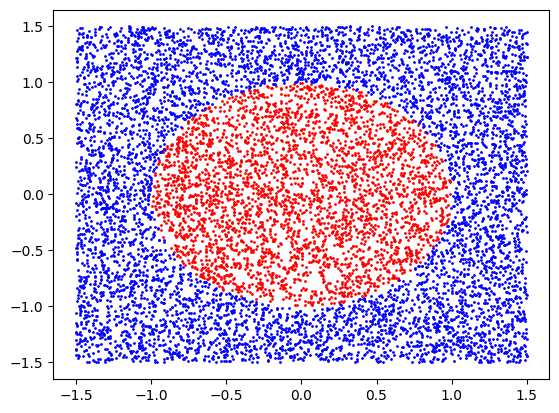

In [96]:
import numpy as np 
import matplotlib.pyplot as plt
number=10000
x=3*np.random.rand(number , 2)-1.5
y = np.zeros((number,))
x , y = Mixer(x , y)
for i in range(y.shape[0]) : 
    if x[i,0]**2 + x[i,1]**2 < 1 : 
        y[i]=1
x_ones= x[y==1 , : ]
x_zeros=x[y==0, :]
plt.scatter(x_ones[: , 0] , x_ones[: , 1] ,s = 1 ,  color='red')
plt.scatter(x_zeros[:, 0] , x_zeros[:,1], s=1, color='blue')
plt.show()


In [69]:
def Mixer(x,y) : 
    n= x.shape[0]
    ind=list(range(n))
    np.random.shuffle(ind)
    x=x[ind , :]
    y=y[ind]
    return x , y 


In [163]:
def sigmoid(x) : 
    return 1/(1+np.exp(-x))
class neoron : 
    def __init__ (self , input_dim) : 
        self.weights = np.random.randn( input_dim , 1)
        self.bias = np.random.randn(1)      
    def learn(self, epochs, X , y, learning_rate) :
        y = y.reshape(-1 , 1)
        loss = np.zeros((epochs,))
        for i in range(epochs) :
            #forward : 
            y_pred = sigmoid(X @ self.weights + self.bias)
            loss[i]= np.sum(-y*np.log(y_pred)-(1-y)*np.log(1-y_pred))/np.size(y_pred)
            #update :
            dz= y_pred - y
            self.bias= self.bias - learning_rate*np.sum(dz)/np.size(dz)
            dw = np.sum(X*dz , axis=0)/np.size(dz)
            print(dw)
            self.weights= self.weights - learning_rate*dw.T
        plt.plot(range(epochs) , loss, color='red')
        plt.show()
    
    def predict(self, x) : 
        return sigmoid(x.T @ self.weights + self.bias)
    

(10000, 2)


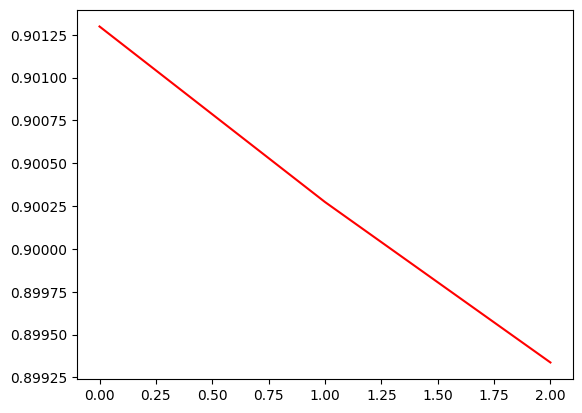

[[0.41143209 0.41062203]
 [0.7236547  0.72284464]]


In [174]:
print(x.shape)
n1=neoron(2) 
n1.learn(epochs=3 , X=x , y=y , learning_rate=0.01)
print(n1.weights)


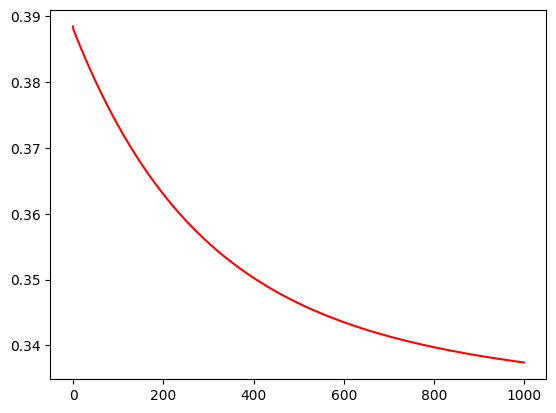

In [161]:
z1 = x[: , 0]
z2 = x[: , 1]
new_x = np.vstack([z1 , z2 , z1*z2 , z1**2 , z2**2 , z1**3 , z2**3 , z1*z2**2 ,z2*z1**2  ])
new_x=new_x.T
n2 = neoron(9)
n2.learn( epochs=1000 ,X=new_x , y=y , learning_rate=0.01)

In [171]:
z1 , z2 = 1 , 1 
Z = np.array([z1 , z2])
Z= Z.reshape(-1 , 1)
print(Z)
print(n1.bias)
sample_x = np.array([z1 , z2 , z1*z2 , z1**2 , z2**2 , z1**3 , z2**3 , z1*z2**2 ,z2*z1**2  ])
sample_x = sample_x.reshape(-1 , 1)
print(n1.predict(Z))


[[1]
 [1]]
[-0.28874801]
[[0.31236749 0.27441304]]
